In [86]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
%matplotlib inline

## Preprocessing

In [37]:
# load data
dataset = pd.read_csv('data1.csv')

# extract into np arrays
X = dataset[['YearsExperience']].values
y = dataset[['Salary']].values

# split data
seed = 0  
test_set_size = 0.2
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y,
    test_size = test_set_size,
    random_state = seed,
)

## Linear Regression

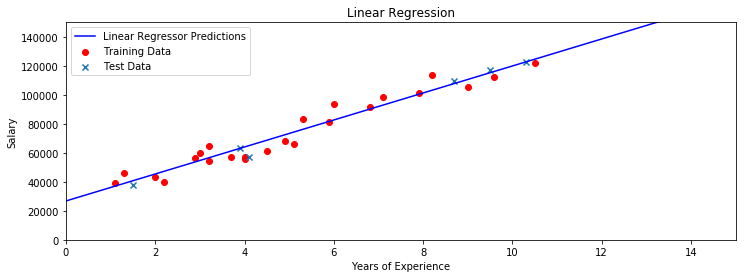

Root mean squared error (RMSE): 3580.979
Mean absolute percentage error (MAPE): 3.830%


In [181]:
# fit model
linear_regressor = sklearn.linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

# make predictions
X_grid = np.reshape(np.linspace(0, 20, 1001), (1001, 1))
linear_preds = linear_regressor.predict(X_grid)

# create plot
plt.figure(figsize=(12,4))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, marker='x', label='Test Data')
plt.plot(X_grid, linear_preds, color='blue', label='Linear Regressor Predictions')
plt.ylim((0, 150000))
plt.xlim((0, 15))

# add annotations
plt.title('Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(loc=2)
plt.show()

# evaluate the predictions
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

linear_preds_test = linear_regressor.predict(X_test)
print('Root mean squared error (RMSE): %0.3f' % np.sqrt(mse(linear_preds_test, y_test)))
print('Mean absolute percentage error (MAPE): %0.3f%%' % mape(linear_preds_test, y_test))

In [187]:
# interpreting the linear model
print('Intercept: %0.3f' % linear_regressor.intercept_)
print('Slope: %0.3f' % linear_regressor.coef_)

Intercept: 26780.099
Slope: 9312.575


## Polynomial Regression

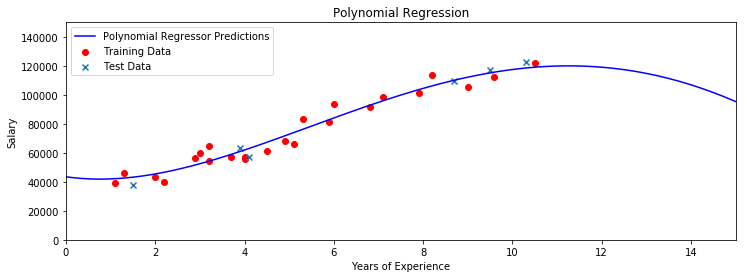

Root mean squared error (RMSE): 3844.564
Mean absolute percentage error (MAPE): 5.206%


In [182]:
# polynomial transform 
polynomial_features = sklearn.preprocessing.PolynomialFeatures(degree=4)
X_poly = polynomial_features.fit_transform(X)

# split polynomial features
X_poly_train, X_poly_test = sklearn.model_selection.train_test_split(
    X_poly, test_size=test_set_size, random_state=seed)

# fit model
polynomial_regressor = sklearn.linear_model.LinearRegression()
polynomial_regressor.fit(X_poly_train, y_train)

# make predictions
X_grid_poly = polynomial_features.transform(X_grid)
polynomial_preds = polynomial_regressor.predict(X_grid_poly)

# create plot
plt.figure(figsize=(12,4))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, marker='x', label='Test Data')
plt.plot(X_grid, polynomial_preds, color='blue', label='Polynomial Regressor Predictions')
plt.ylim((0, 150000))
plt.xlim((0, 15))

# add annotations
plt.title('Polynomial Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# evaluate the predictions
polynomial_preds_test = polynomial_regressor.predict(X_poly_test)
print('Root mean squared error (RMSE): %0.3f' % np.sqrt(mse(polynomial_preds_test, y_test)))
print('Mean absolute percentage error (MAPE): %0.3f%%' % mape(polynomial_preds_test, y_test))

## Questions

* What happens as we include higher degree polynomial terms in the regression?
* What is the maximum degree polynomial that we can fit to the training data?
* What degree polynomial is the best (in terms of minimizing the test set RMSE)?
* What happens when we use our models to make predictions for employees with more than 15 years of experience?  Which model would you trust most?